# Proof of concept visualizing SOM grid with NKI data

 * Cluster cells with SOM
 * Visualize SOM grid
 * View UMAP
 * View label-node scores
 * View MST from scores?

In [176]:
# Imports
import pandas as pd
import numpy as np
import umap.umap_ as umap
import umap.plot
import scipy.stats.mstats as mstats
import matplotlib.pyplot as plt
import sklearn.preprocessing
import skfuzzy as fuzz
import seaborn as sns

## set up params as if inside tribus
Read input data

In [2]:
input_path = "tests/nki_cycif/input_data/TMA_34_504_cellTypes.csv"
sample_data = pd.read_csv(input_path)

In [123]:
sample_data.columns

Index(['Row_number', 'CoreId', 'CellId', 'DNA1', 'BG488', 'BG555', 'BG647',
       'DNA2', 'CD11c', 'CD207', 'GranzymeB', 'DNA3', 'CD163', 'CD57', 'CD20',
       'DNA4', 'CD4', 'CD3d', 'CD8a', 'DNA5', 'TIM3', 'pSTAT1', 'PDL1', 'DNA6',
       'CD45RO', 'FOXP3', 'PD1', 'DNA7', 'pTBK1', 'CD68', 'PDL1_2', 'DNA8',
       'CD15', 'CD11b', 'yH2AX', 'DNA9', 'PDL1_488', 'PDL1_555', 'cPARP1',
       'DNA10', 'Ki67', 'Vimentin', 'MHCII', 'DNA11', 'LaminB1', 'CK7', 'MHCI',
       'DNA12', 'ECadherin', 'aSMA', 'CD31', 'Area', 'MajorAxisLength',
       'MinorAxisLength', 'Eccentricity', 'Solidity', 'Perimeter', 'Roundness',
       'X_position', 'Y_position', 'lost', 'Inside_ROI', 'GlobalCellType',
       'out_of_core'],
      dtype='object')

In [3]:
excel_file = "tests/nki_cycif/celltype_description.xlsx"
df = pd.ExcelFile(excel_file)
logic = pd.read_excel(df, df.sheet_names, index_col=0)
levels = list(logic.keys())
level_id = 0 # this test considers only the first level
level = levels[level_id]

In [21]:
# filter sample data to only channels involved in this level
filtered_data = np.log2(sample_data[logic[level].index.values])
marker_data = filtered_data.to_numpy()

In [22]:
logic[level].index.values
#marker_data
filtered_data

,CK7,ECadherin,CD3d,CD20,CD4,CD8a,aSMA,Vimentin,CD31,CD11c,MHCII,CD11b,CD207,CD163
0,5.531483,8.353576,9.036959,10.170770,8.831739,11.322312,6.492061,7.956008,9.879076,9.671392,10.655461,8.190177,9.603626,9.390211
1,5.607283,8.460542,9.357807,10.203877,8.856395,11.542642,7.110479,8.444788,9.918729,9.777197,10.420762,8.317588,9.957963,9.469458
2,5.670692,8.405170,9.996843,10.240621,8.915961,12.285263,7.194388,11.248448,9.970243,11.247948,11.356508,8.681322,10.160051,10.410920
3,6.030405,8.618529,10.127670,10.258704,9.155398,12.200601,7.211684,11.765226,10.242589,10.294159,10.693774,8.992171,10.686466,9.962880
4,5.793075,8.511753,9.478603,10.319492,8.897409,11.294422,7.806923,8.792354,9.985930,9.717385,10.849711,8.393844,9.938178,9.604276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304620,5.609061,8.361757,8.987738,10.236421,8.860713,11.309069,8.403057,13.026924,9.912677,10.226335,10.313695,8.182165,9.943627,9.653976
304621,5.835927,8.448960,9.072652,10.239031,9.026021,11.337922,8.232731,12.824002,9.906463,10.531814,11.141782,8.361932,10.069869,10.045186
304622,5.409109,8.350300,9.298051,10.738118,9.132045,11.344373,6.969652,10.685759,9.869345,12.410022,10.382039,8.313049,11.016702,10.941035
304623,5.964319,8.439614,8.991575,10.183159,8.897857,11.293873,8.856878,12.423745,9.899430,9.812135,10.312265,8.282725,11.490701,9.529620


Compute UMAP and plot

In [33]:
testumap = umap.UMAP(verbose=True, n_jobs=18, min_dist=0.0, n_neighbors=30)
mapper = testumap.fit(marker_data)

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.0, n_jobs=18, n_neighbors=30,
     verbose=True)
Construct fuzzy simplicial set
Mon Jan 31 15:39:12 2022 Finding Nearest Neighbors
Mon Jan 31 15:39:12 2022 Building RP forest with 33 trees
Mon Jan 31 15:39:13 2022 NN descent for 18 iterations
	 1  /  18
	 2  /  18
	Stopping threshold met -- exiting after 2 iterations
Mon Jan 31 15:39:22 2022 Finished Nearest Neighbor Search
Mon Jan 31 15:39:26 2022 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon Jan 31 15:42:06 2022 Finished embedding


array([[ 7.61058  , 11.042133 ],
       [ 7.5941963, 11.185114 ],
       [ 6.491583 , 15.717673 ],
       ...,
       [ 7.243929 , 17.437601 ],
       [12.725614 ,  9.0256   ],
       [ 9.810579 , 14.92776  ]], dtype=float32)

<AxesSubplot:>

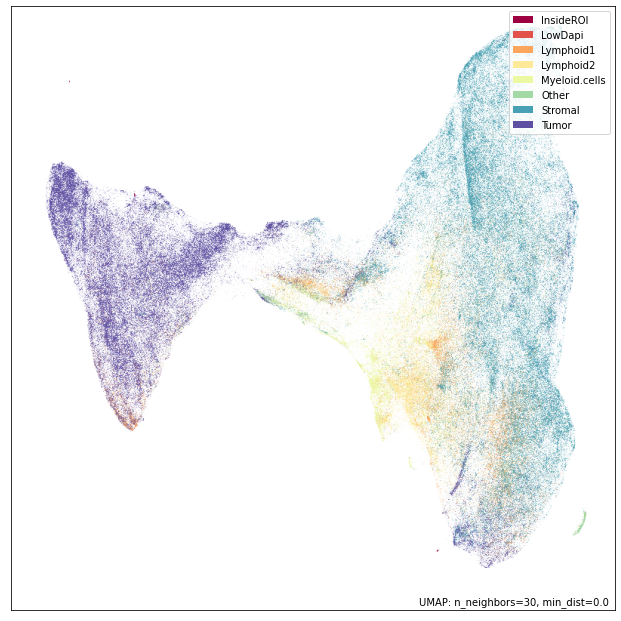

In [34]:
# Plot UMAP
umap.plot.points(mapper, labels=sample_data.GlobalCellType)

#umap.plot.points(mapper, values=filtered_data.CD3d)

#umap.plot.diagnostic(mapper, diagnostic_type='neighborhood')

In [132]:
# select non-tumor
myList = ['Stromal', 'Myeloid.cells']
#sample_data.GlobalCellType.isin(myList)
normal_cells_full = sample_data[sample_data.GlobalCellType.isin(myList)]
normal_cells = filtered_data[sample_data.GlobalCellType.isin(myList)]
normal_cells



,CK7,ECadherin,CD3d,CD20,CD4,CD8a,aSMA,Vimentin,CD31,CD11c,MHCII,CD11b,CD207,CD163
6,5.831591,8.570440,9.459668,10.251634,8.989849,11.327960,8.397793,10.632622,10.177467,9.712865,10.428016,8.541212,10.423601,9.611545
8,5.692034,8.455713,9.492521,10.222053,8.837956,11.285216,10.382050,11.019156,9.885061,9.672296,10.323500,8.235117,9.605788,9.470617
11,5.841141,8.472222,9.516363,10.223294,8.892017,11.436166,11.026131,11.900003,9.893768,9.665592,10.361037,8.202265,9.754261,9.538487
13,5.861353,8.519313,9.696235,10.320704,9.277578,11.310976,6.917926,7.923349,9.977469,10.481493,12.475122,8.702754,10.517979,11.116010
14,6.001965,8.617959,9.721834,10.232700,9.070261,11.351944,9.023980,12.068300,10.721656,10.347100,10.881776,8.767087,10.272765,9.934017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304620,5.609061,8.361757,8.987738,10.236421,8.860713,11.309069,8.403057,13.026924,9.912677,10.226335,10.313695,8.182165,9.943627,9.653976
304621,5.835927,8.448960,9.072652,10.239031,9.026021,11.337922,8.232731,12.824002,9.906463,10.531814,11.141782,8.361932,10.069869,10.045186
304622,5.409109,8.350300,9.298051,10.738118,9.132045,11.344373,6.969652,10.685759,9.869345,12.410022,10.382039,8.313049,11.016702,10.941035
304623,5.964319,8.439614,8.991575,10.183159,8.897857,11.293873,8.856878,12.423745,9.899430,9.812135,10.312265,8.282725,11.490701,9.529620


In [44]:
def score_marker_pos(x):
    res = [ (np.percentile(x, 99) - i)**2 for i in x]
    return res

def score_marker_neg(x):
    res = [ (i - np.min(x))**2 for i in x]
    return res

def normalize_scores(x):
    res = 1 - ((x - np.min(x)) / (np.max(x) - np.min(x)))
    return res

def scoreNodes(data_to_score, labels, level):
    '''scoring function'''
    level_logic_df = labels[level]
    scores_matrix = np.zeros((data_to_score.shape[0], labels[level].shape[1]))
    for idx, cell_type in enumerate(labels[level].columns.values):
        list_negative = list(level_logic_df.loc[level_logic_df[cell_type] == -1].index)
        print(list_negative)
        list_positive = list(level_logic_df.loc[level_logic_df[cell_type] == 1].index)
        print(list_positive)
        # TODO: launch error if len(list_positive) == 0
        gating_positive = data_to_score[list_positive].to_numpy()
        gating_negative = data_to_score[list_negative].to_numpy()
        #
        marker_scores_positive = np.apply_along_axis(score_marker_pos, 0, gating_positive)
        marker_scores_negative = np.apply_along_axis(score_marker_neg, 0, gating_negative)
        #
        marker_scores = np.column_stack((marker_scores_positive,marker_scores_negative))
        normalized_marker_scores = np.apply_along_axis(normalize_scores, 0, marker_scores)
        scores_matrix[:, idx] = np.mean(normalized_marker_scores, 1)
    scores_pd = pd.DataFrame(scores_matrix, columns=labels[level].columns.values)
    return(scores_pd)

In [54]:
#marker_data.shape
#logic[level].shape
filtered_data

,CK7,ECadherin,CD3d,CD20,CD4,CD8a,aSMA,Vimentin,CD31,CD11c,MHCII,CD11b,CD207,CD163
0,5.531483,8.353576,9.036959,10.170770,8.831739,11.322312,6.492061,7.956008,9.879076,9.671392,10.655461,8.190177,9.603626,9.390211
1,5.607283,8.460542,9.357807,10.203877,8.856395,11.542642,7.110479,8.444788,9.918729,9.777197,10.420762,8.317588,9.957963,9.469458
2,5.670692,8.405170,9.996843,10.240621,8.915961,12.285263,7.194388,11.248448,9.970243,11.247948,11.356508,8.681322,10.160051,10.410920
3,6.030405,8.618529,10.127670,10.258704,9.155398,12.200601,7.211684,11.765226,10.242589,10.294159,10.693774,8.992171,10.686466,9.962880
4,5.793075,8.511753,9.478603,10.319492,8.897409,11.294422,7.806923,8.792354,9.985930,9.717385,10.849711,8.393844,9.938178,9.604276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304620,5.609061,8.361757,8.987738,10.236421,8.860713,11.309069,8.403057,13.026924,9.912677,10.226335,10.313695,8.182165,9.943627,9.653976
304621,5.835927,8.448960,9.072652,10.239031,9.026021,11.337922,8.232731,12.824002,9.906463,10.531814,11.141782,8.361932,10.069869,10.045186
304622,5.409109,8.350300,9.298051,10.738118,9.132045,11.344373,6.969652,10.685759,9.869345,12.410022,10.382039,8.313049,11.016702,10.941035
304623,5.964319,8.439614,8.991575,10.183159,8.897857,11.293873,8.856878,12.423745,9.899430,9.812135,10.312265,8.282725,11.490701,9.529620


In [46]:
scores_pd = scoreNodes(filtered_data, logic, level)

['CD3d', 'CD4', 'CD31', 'CD11c', 'CD11b', 'CD207', 'CD163']
['CK7', 'ECadherin']
['CK7', 'ECadherin', 'aSMA', 'Vimentin', 'CD163']
['CD3d', 'CD20', 'CD4', 'CD8a']
['CK7', 'ECadherin', 'CD3d', 'CD20', 'aSMA', 'Vimentin']
['CD11c', 'MHCII', 'CD11b', 'CD207', 'CD163']
['CK7', 'CD3d', 'CD20', 'CD11c', 'CD11b', 'CD207', 'CD163']
['aSMA', 'Vimentin', 'CD31']


In [ ]:
# winsorize first then score
normalized_data = mstats.winsorize()

In [48]:
mapper_scores = testumap.fit(scores_pd)

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.0, n_jobs=18, n_neighbors=30,
     verbose=True)
Construct fuzzy simplicial set
Tue Feb  1 09:47:19 2022 Finding Nearest Neighbors
Tue Feb  1 09:47:19 2022 Building RP forest with 33 trees
Tue Feb  1 09:47:20 2022 NN descent for 18 iterations
	 1  /  18
	 2  /  18
	Stopping threshold met -- exiting after 2 iterations
Tue Feb  1 09:47:29 2022 Finished Nearest Neighbor Search
Tue Feb  1 09:47:33 2022 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Tue Feb  1 09:50:09 2022 Finished embedding


<AxesSubplot:>

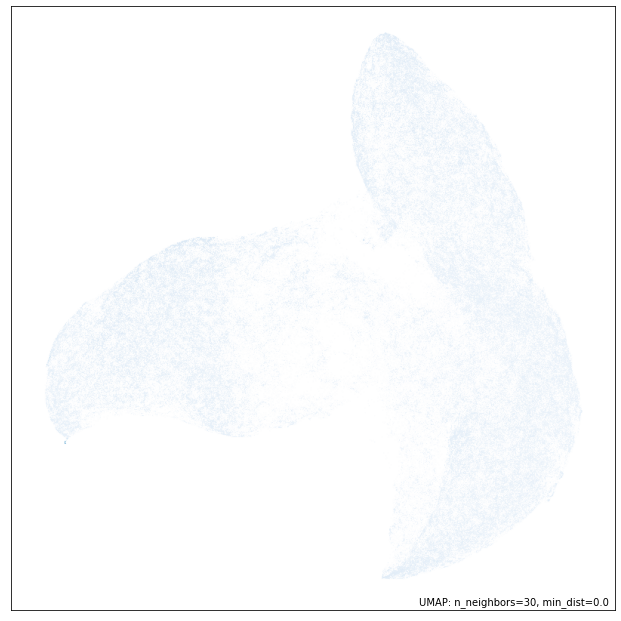

In [53]:
umap.plot.points(mapper_scores, values=filtered_data.CD20)


# Check effect of transformations

array([<AxesSubplot:title={'center':'CK7'}>,
       <AxesSubplot:title={'center':'ECadherin'}>,
       <AxesSubplot:title={'center':'CD3d'}>,
       <AxesSubplot:title={'center':'CD20'}>,
       <AxesSubplot:title={'center':'CD4'}>,
       <AxesSubplot:title={'center':'CD8a'}>,
       <AxesSubplot:title={'center':'aSMA'}>,
       <AxesSubplot:title={'center':'Vimentin'}>,
       <AxesSubplot:title={'center':'CD31'}>,
       <AxesSubplot:title={'center':'CD11c'}>,
       <AxesSubplot:title={'center':'MHCII'}>,
       <AxesSubplot:title={'center':'CD11b'}>,
       <AxesSubplot:title={'center':'CD207'}>,
       <AxesSubplot:title={'center':'CD163'}>], dtype=object)

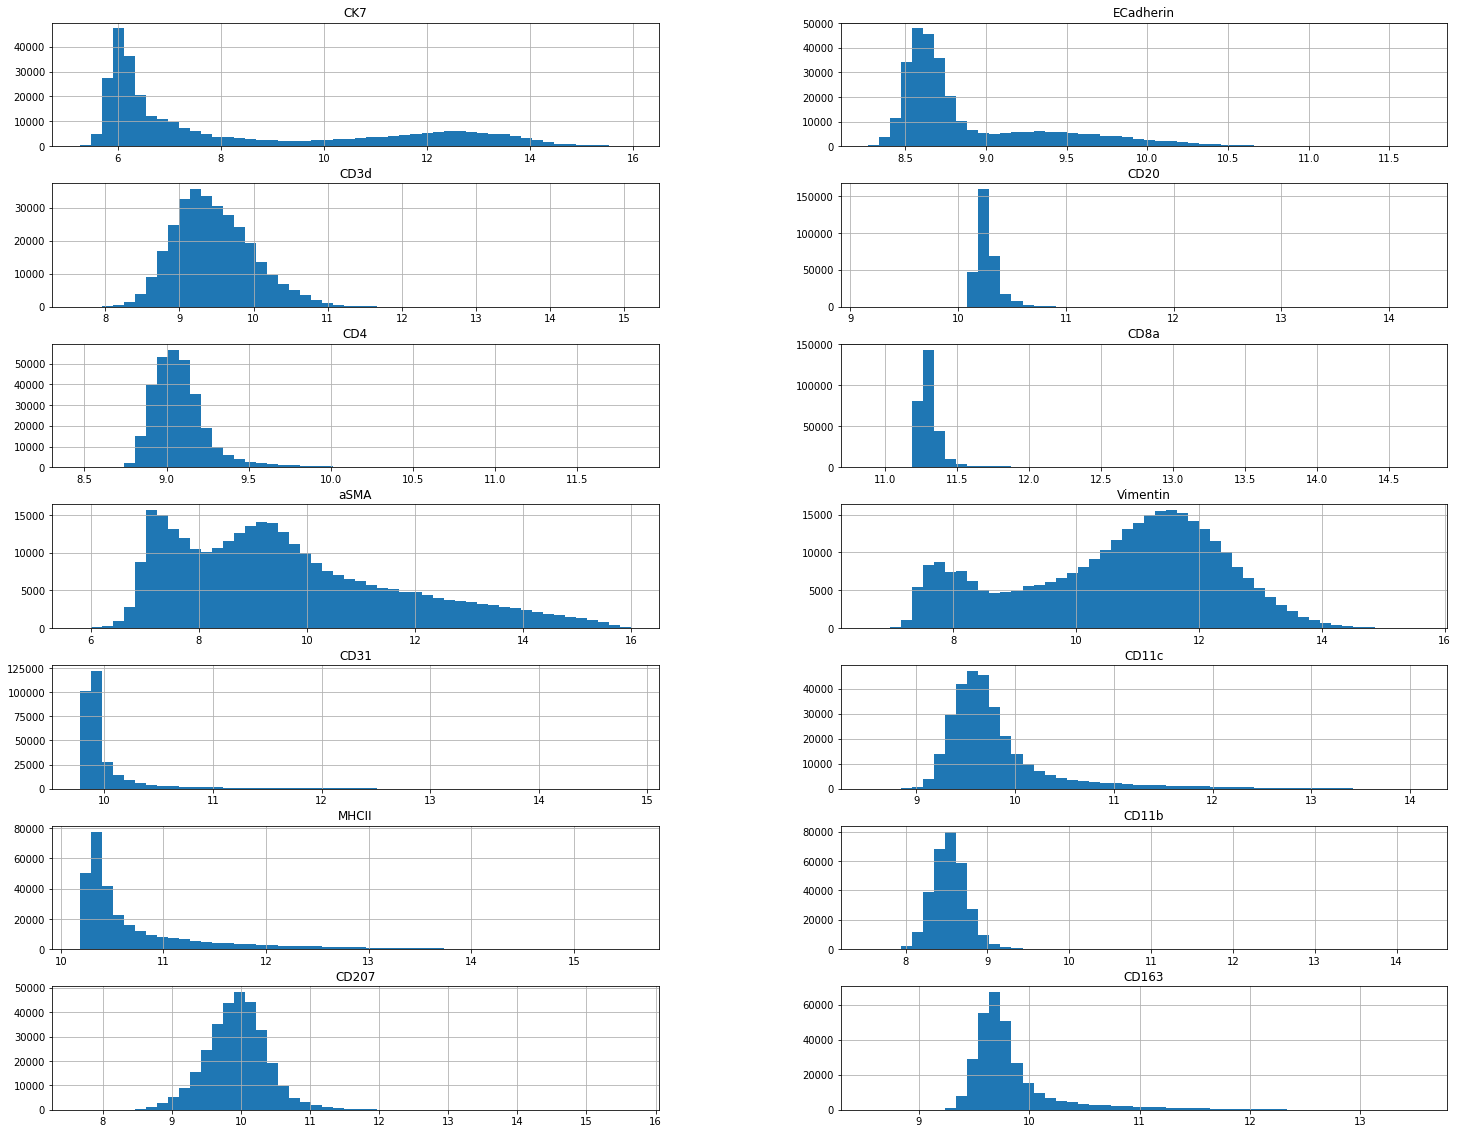

In [63]:
# Plot data after log transform

fig, axis = plt.subplots(7,2,figsize=(25, 20))
filtered_data.hist(ax=axis, bins=50)

array([<AxesSubplot:title={'center':'CK7'}>,
       <AxesSubplot:title={'center':'ECadherin'}>,
       <AxesSubplot:title={'center':'CD3d'}>,
       <AxesSubplot:title={'center':'CD20'}>,
       <AxesSubplot:title={'center':'CD4'}>,
       <AxesSubplot:title={'center':'CD8a'}>,
       <AxesSubplot:title={'center':'aSMA'}>,
       <AxesSubplot:title={'center':'Vimentin'}>,
       <AxesSubplot:title={'center':'CD31'}>,
       <AxesSubplot:title={'center':'CD11c'}>,
       <AxesSubplot:title={'center':'MHCII'}>,
       <AxesSubplot:title={'center':'CD11b'}>,
       <AxesSubplot:title={'center':'CD207'}>,
       <AxesSubplot:title={'center':'CD163'}>], dtype=object)

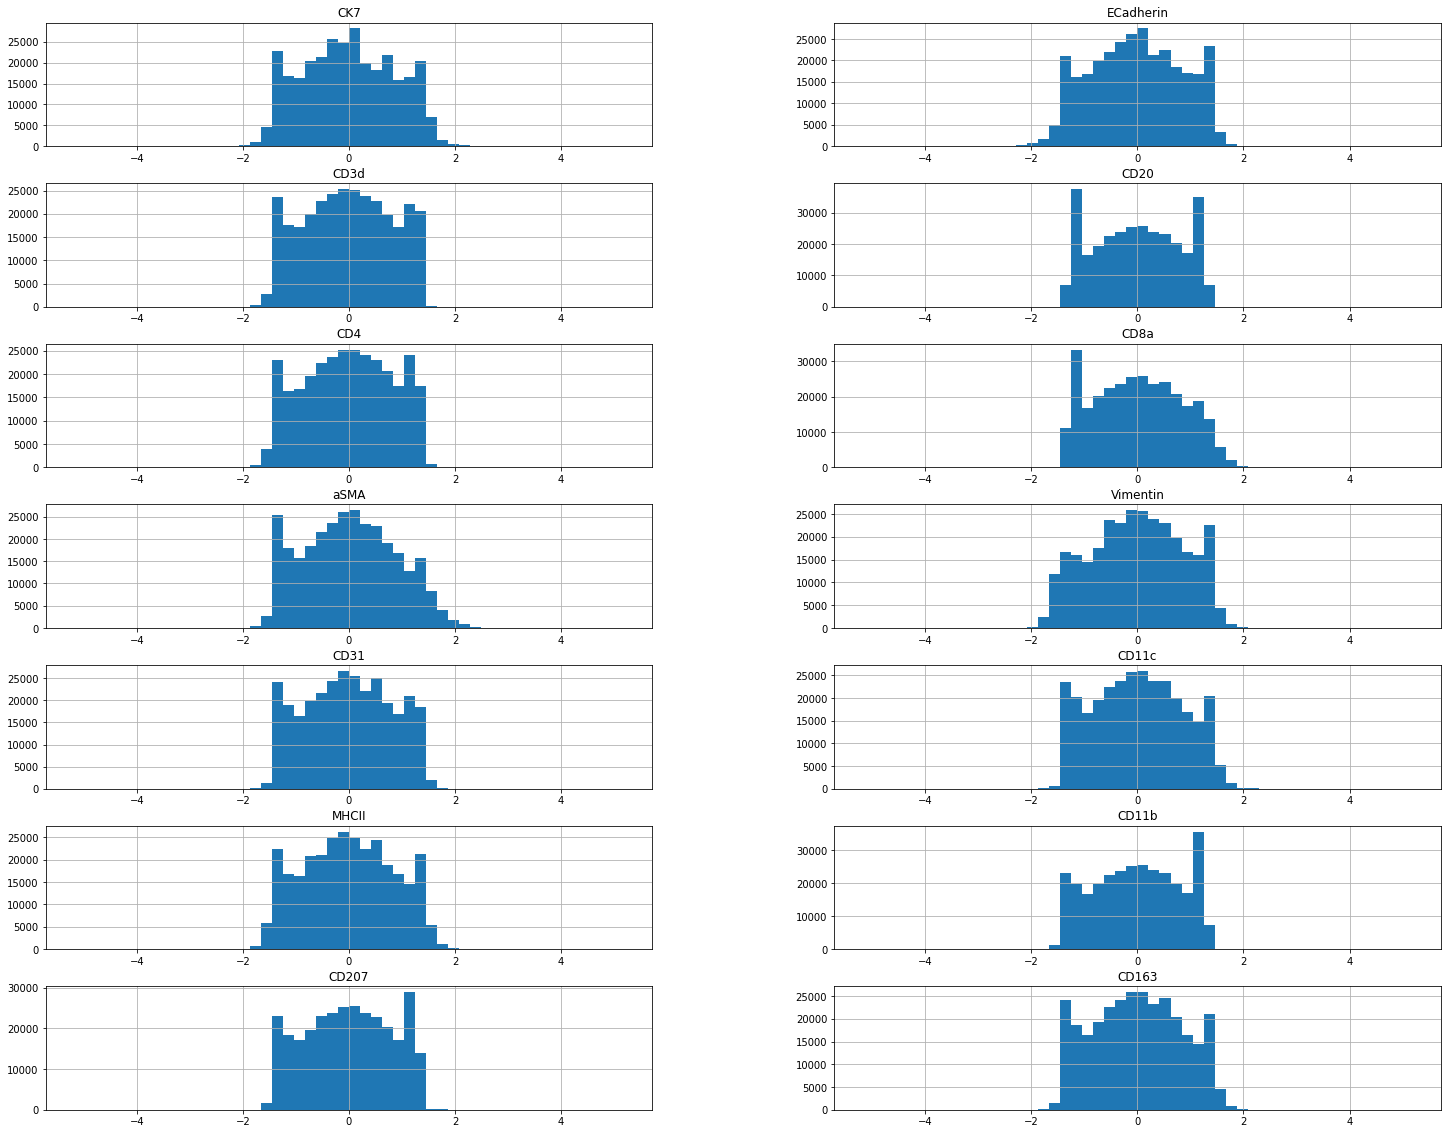

In [76]:
#normalized1 = sklearn.preprocessing.power_transform(filtered_data)
normalized1 = sklearn.preprocessing.quantile_transform(filtered_data, n_quantiles=10, output_distribution='normal')
normalized1 = pd.DataFrame(normalized1, columns = filtered_data.columns)
fig, axis = plt.subplots(7,2,figsize=(25, 20))
normalized1.hist(ax=axis, bins=50)

# Test fuzzy classifiers

In [110]:
filtered_data

,CK7,ECadherin,CD3d,CD20,CD4,CD8a,aSMA,Vimentin,CD31,CD11c,MHCII,CD11b,CD207,CD163
0,5.531483,8.353576,9.036959,10.170770,8.831739,11.322312,6.492061,7.956008,9.879076,9.671392,10.655461,8.190177,9.603626,9.390211
1,5.607283,8.460542,9.357807,10.203877,8.856395,11.542642,7.110479,8.444788,9.918729,9.777197,10.420762,8.317588,9.957963,9.469458
2,5.670692,8.405170,9.996843,10.240621,8.915961,12.285263,7.194388,11.248448,9.970243,11.247948,11.356508,8.681322,10.160051,10.410920
3,6.030405,8.618529,10.127670,10.258704,9.155398,12.200601,7.211684,11.765226,10.242589,10.294159,10.693774,8.992171,10.686466,9.962880
4,5.793075,8.511753,9.478603,10.319492,8.897409,11.294422,7.806923,8.792354,9.985930,9.717385,10.849711,8.393844,9.938178,9.604276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304620,5.609061,8.361757,8.987738,10.236421,8.860713,11.309069,8.403057,13.026924,9.912677,10.226335,10.313695,8.182165,9.943627,9.653976
304621,5.835927,8.448960,9.072652,10.239031,9.026021,11.337922,8.232731,12.824002,9.906463,10.531814,11.141782,8.361932,10.069869,10.045186
304622,5.409109,8.350300,9.298051,10.738118,9.132045,11.344373,6.969652,10.685759,9.869345,12.410022,10.382039,8.313049,11.016702,10.941035
304623,5.964319,8.439614,8.991575,10.183159,8.897857,11.293873,8.856878,12.423745,9.899430,9.812135,10.312265,8.282725,11.490701,9.529620


[ 7.61058    7.5941963  6.491583  ...  7.243929  12.725614   9.810579 ]
[9.049365   3.7693114  0.18252183 ... 2.0527549  3.423412   2.905985  ]
[ 9.049365    3.7693114   0.18252183 ... -3.58328     2.0527549
  2.905985  ]
[ 7.61058    7.5941963  6.491583  ...  7.243929  12.725614   9.810579 ]
[14.229979 13.466828  9.057179 ...  8.007414 12.277216 11.519667]
[ 8.720618   6.7011623  8.082743  ... 11.519667   7.3995566 10.017728 ]
[13.466828   9.057179  11.867352  ... 11.974905  10.7803335 12.277216 ]
[ 7.61058    7.5941963  6.491583  ...  7.243929  12.725614   9.810579 ]
[ 9.049365    3.7693114   0.18252183 ...  0.05535449 -3.58328
  2.905985  ]
[14.229979  8.342558 10.232877 ... 12.207928 10.017728 12.290377]
[ 7.61058    7.5941963  6.491583  ...  7.243929  12.725614   9.810579 ]
[-0.620824   -0.39575785 -0.5429232  ... -2.1960063  -3.6631057
 -3.58328   ]
[13.466828  9.057179 11.867352 ... 10.597482 12.264296 11.974905]
[9.049365   3.7693114  0.18252183 ... 2.0527549  3.423412   2.9059

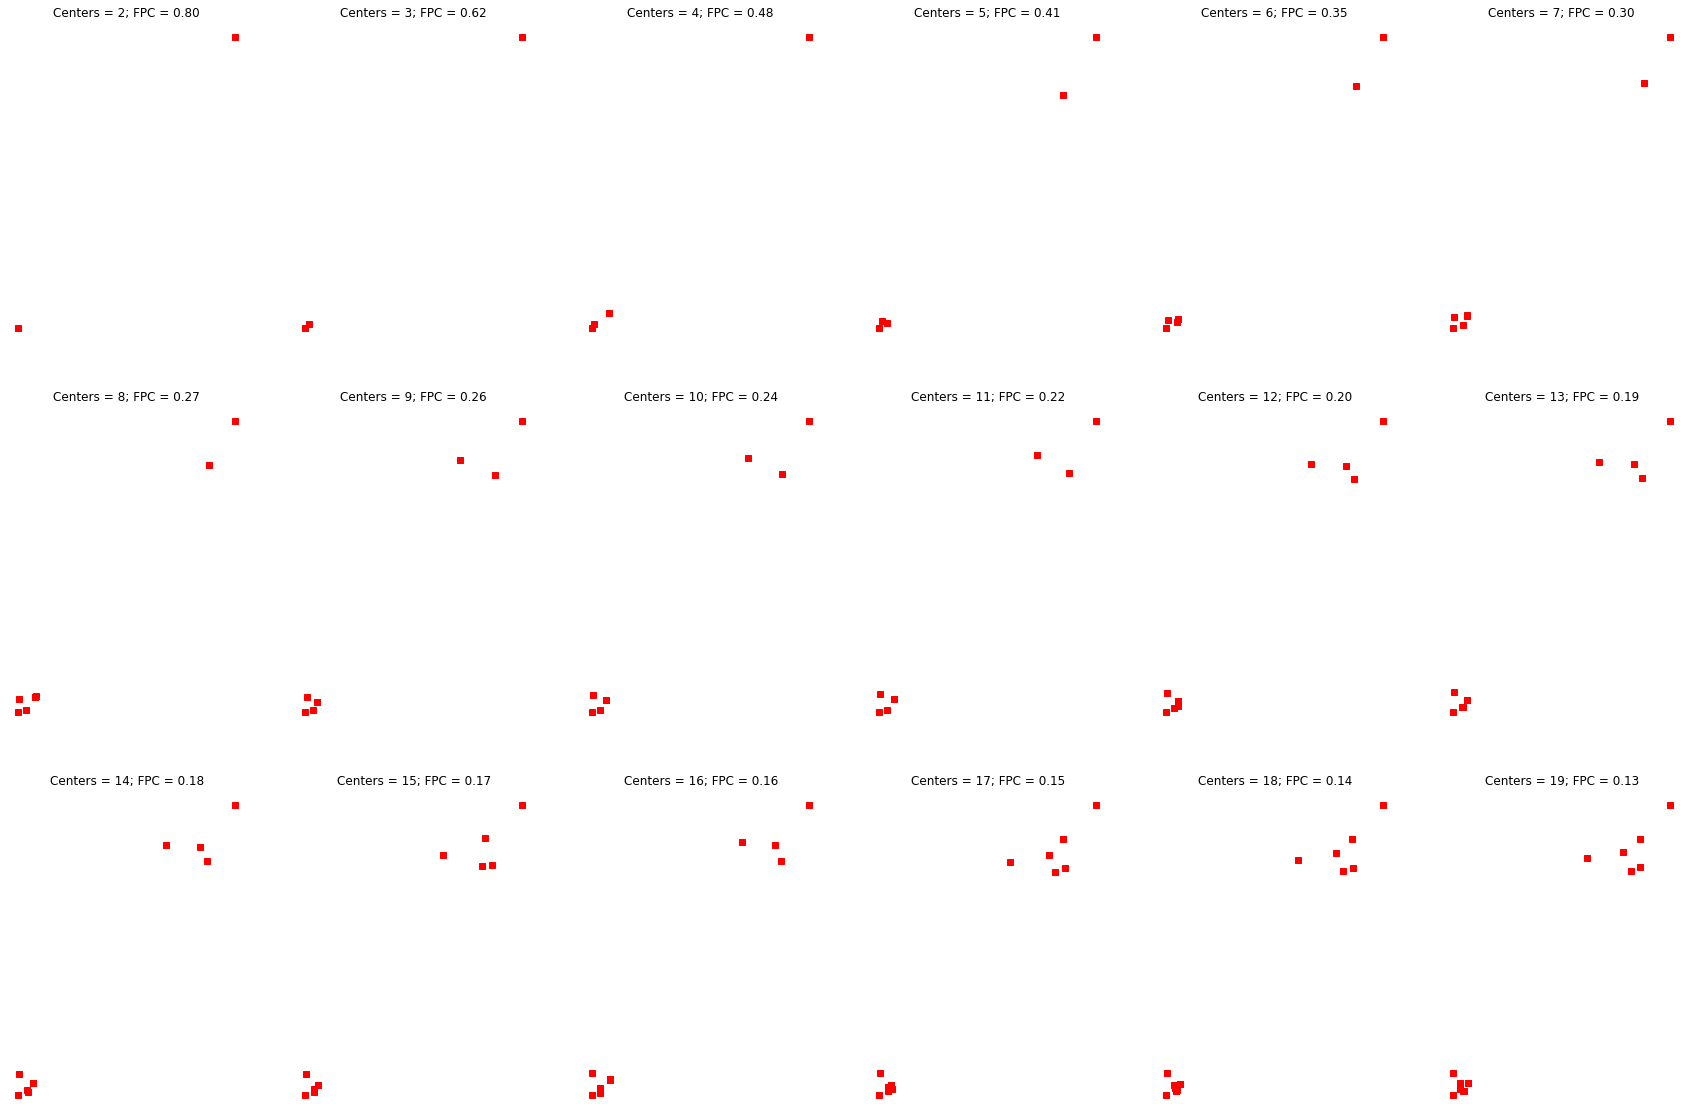

In [122]:
#
fig1, axes1 = plt.subplots(3, 6, figsize=(30, 20))
fpcs = []

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        filtered_data.transpose(copy=True), ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)
    
    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    cmap = get_cmap(ncenters)
    for j in range(ncenters):
        print(mapper.embedding_.T[0][cluster_membership == j])
        #ax.plot(mapper.embedding_.T[0][cluster_membership == j], mapper.embedding_[1][cluster_membership == j], '.', color=cmap[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.0, n_jobs=18, n_neighbors=30,
     verbose=True)
Construct fuzzy simplicial set
Tue Feb  1 18:17:51 2022 Finding Nearest Neighbors
Tue Feb  1 18:17:51 2022 Building RP forest with 24 trees
Tue Feb  1 18:17:51 2022 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	Stopping threshold met -- exiting after 2 iterations
Tue Feb  1 18:17:56 2022 Finished Nearest Neighbor Search
Tue Feb  1 18:17:58 2022 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Tue Feb  1 18:19:06 2022 Finished embedding


<AxesSubplot:>

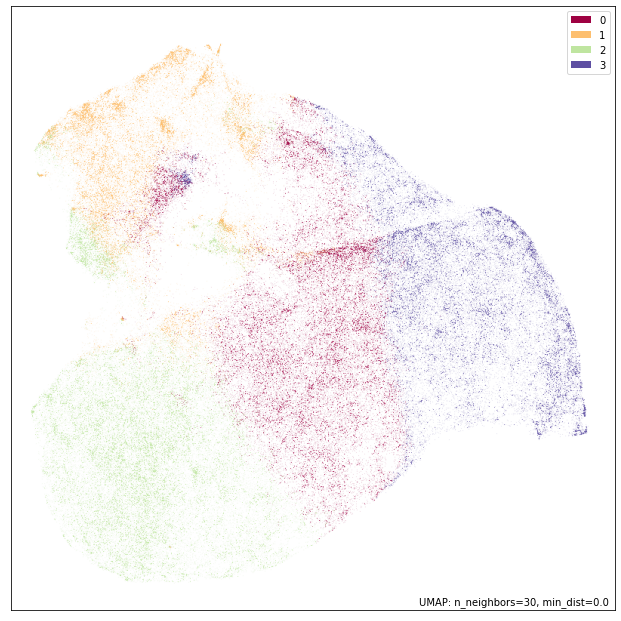

In [135]:
testumap1 = umap.UMAP(verbose=True, n_jobs=18, min_dist=0.0, n_neighbors=30)
mapper_normal = testumap1.fit(normal_cells)
ncenters = 4
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(normal_cells.transpose(copy=True), ncenters, 2, error=0.005, maxiter=1000, init=None)
cluster_membership = np.argmax(u, axis=0)
umap.plot.points(mapper_normal, labels=cluster_membership)

In [140]:
cntr_embedding = mapper_normal.transform(cntr)

	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs


[2 2 0 ... 2 2 2]
[-1.1327465  2.1866858  3.14042   ... -3.2314694 -1.7367378 -2.9251022]


<AxesSubplot:>

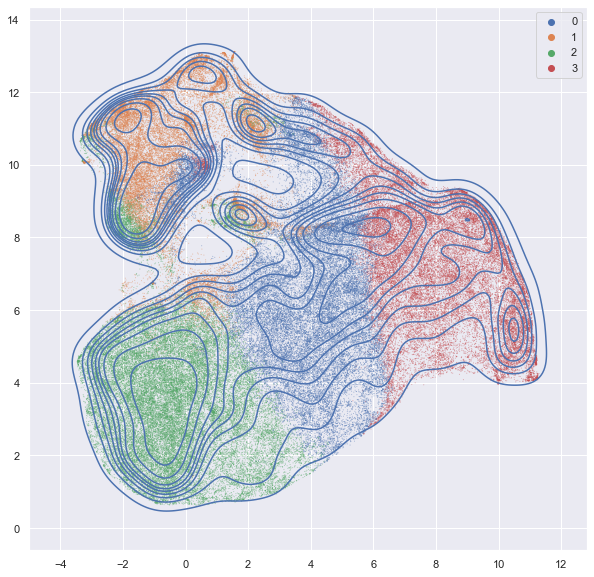

In [194]:
#plt.scatter(cntr_embedding[:, 0], cntr_embedding[:, 1], s= 5)
#fig1, ax = plt.subplots()
print(cluster_membership)
print(mapper_normal.embedding_[:,0])
sns.set(rc = {'figure.figsize':(10,10)})
sns.scatterplot(x=mapper_normal.embedding_[:,0], y=mapper_normal.embedding_[:,1], hue=cluster_membership, palette='deep', linewidth=0, alpha=0.5, s=1)
sns.kdeplot(x=mapper_normal.embedding_[:,0], y=mapper_normal.embedding_[:,1])
#for pt in cntr_embedding:
#    print(pt)

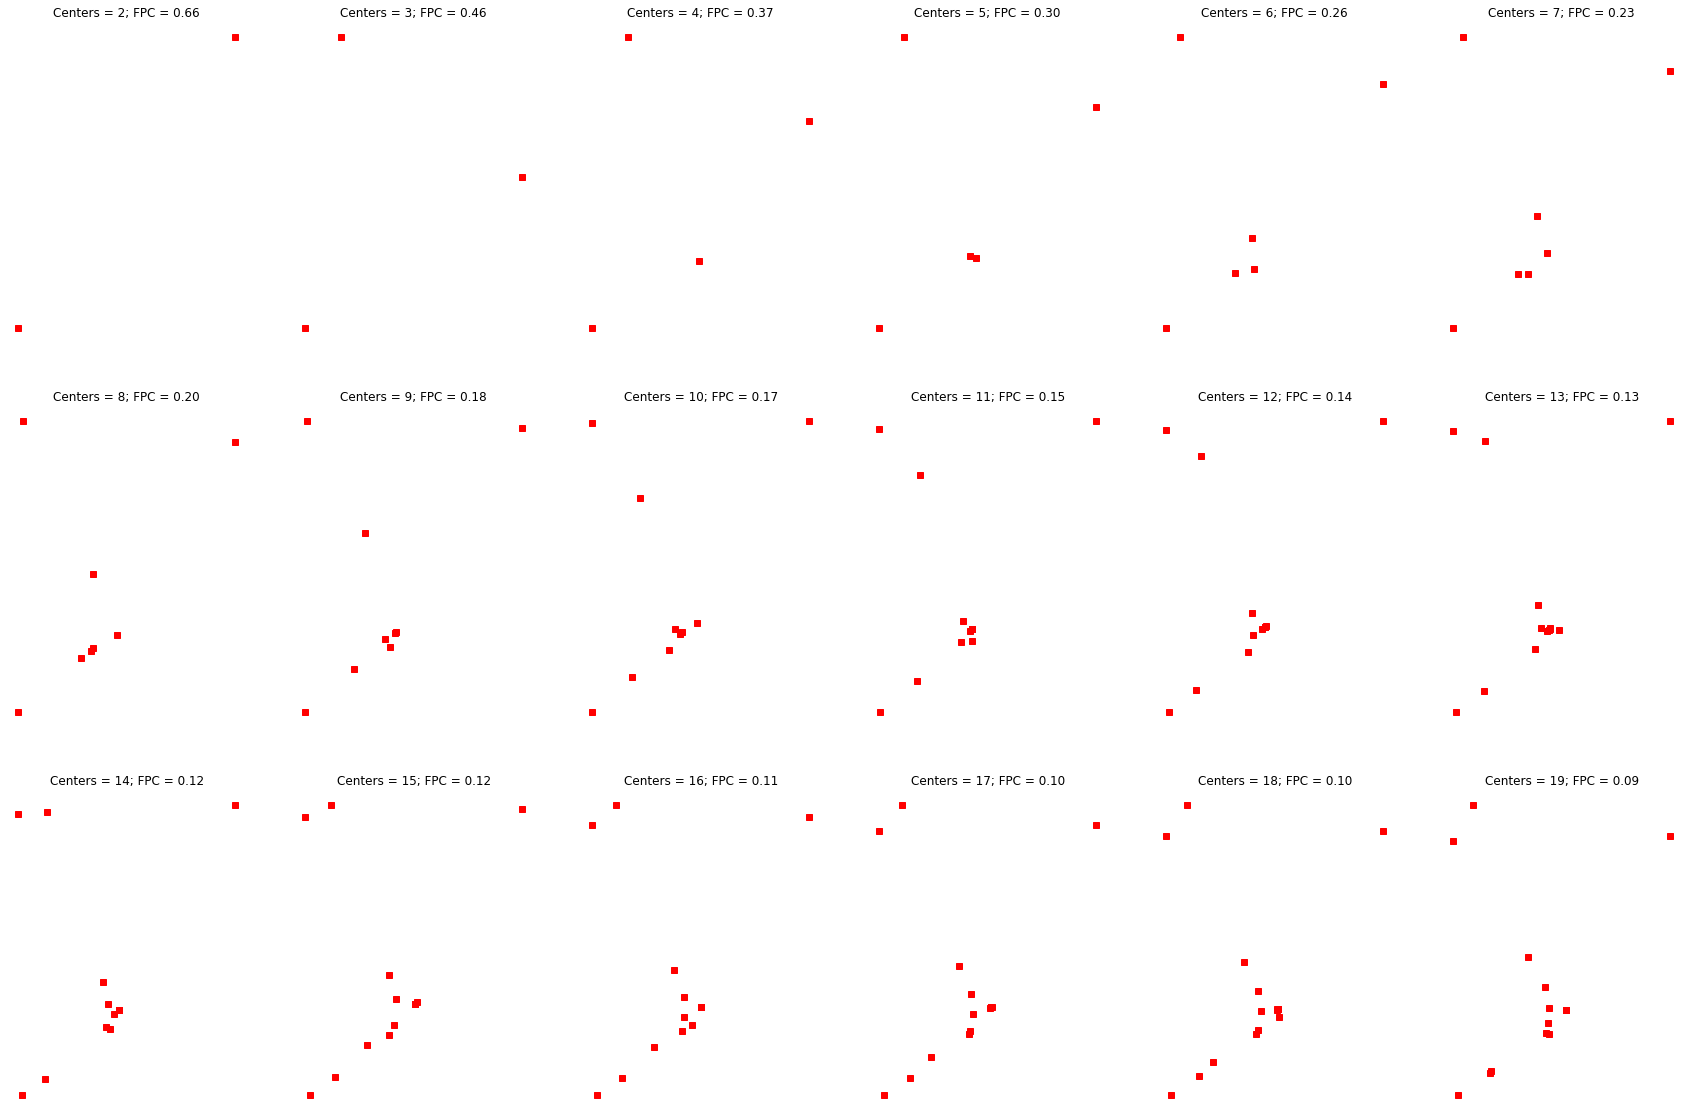

In [133]:
# Same but only with non tumor
fig1, axes1 = plt.subplots(3, 6, figsize=(30, 20))
fpcs = []

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        normal_cells.transpose(copy=True), ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)
    
    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    cmap = get_cmap(ncenters)
    #for j in range(ncenters):
        #print(mapper.embedding_.T[0][cluster_membership == j])
        #ax.plot(mapper_normal.embedding_.T[0][cluster_membership == j], mapper_normal.embedding_[1][cluster_membership == j], '.', color=cmap[j])

    # Mark the center of each fuzzy cluster
    cntr_embedding = mapper_normal.transform(cntr)
    for pt in cntr_embedding:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

Text(0, 0.5, 'Fuzzy partition coefficient')

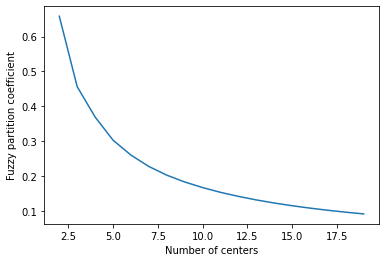

In [134]:
#
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:20], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")